# CPSC 330 - Applied Machine Learning 

## Homework 2: Decision trees and machine learning fundamentals 
### Associated lectures: [Lectures 2 and 3](https://github.com/UBC-CS/cpsc330-2022W2/tree/main/lectures) 

**Due date: Monday Jan 23, 2023 at 11:59pm**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["font.size"] = 16

from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.tree import DecisionTreeClassifier

## Instructions
rubric={points:3}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2022W2/blob/main/docs/homework_instructions.md). In particular, **see the note about not pushing downloaded data to your repo**.

You are allowed to work and submit in pairs in this homework assignment. 

## Introducing the data set
 
For this  assignment you'll be looking at Kaggle's [Spotify Song Attributes](https://www.kaggle.com/geomack/spotifyclassification/) dataset.
The dataset contains a number of features of songs from 2017 and a binary variable `target` that represents whether the user liked the song (encoded as 1) or not (encoded as 0). See the documentation of all the features [here](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/). 

This dataset is publicly available on Kaggle, and you will have to download it yourself. Follow the steps below to get the data CSV. 

1. If you do not have an account with [Kaggle](https://www.kaggle.com/), you will first need to create one (it's free).
2. Login to your account and [download](https://www.kaggle.com/geomack/spotifyclassification/download) the dataset.
3. Unzip the data file if needed, then rename it to `spotify.csv`, and move it to the same directory as this notebook.

## Exercise 1: Exploratory data analysis

#### 1(a) 
rubric={points:2}

Read in the data CSV and store it as a pandas dataframe named `spotify_df`. The first column of the .csv file should be set as the index. **Note:** you may need to change the name of the file if it does not match the download.

In [3]:
spotify_df = pd.read_csv("spotify.csv",index_col=0)
spotify_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

Excluding the target, how many columns (potential features) does the dataset include


*15*

#### 1(b)
rubric={points:2}

Run the following line of code to split the data. How many training and test examples do we have?

> Note: we are setting the `random_state` so that everyone has the same split on their assignments. This will make it easier for the TAs to grade.

In [4]:
df_train, df_test = train_test_split(spotify_df, test_size=0.2, random_state=321)
len(df_train)
len(df_test)


404

*1613 examples for training and 404 examples for testing*

#### 1(c)
rubric={points:3}

- Print out the output of `describe()` **on the training split**. This will compute some summary statistics of the numeric columns.
- Which feature has the largest range? 

> Hint: You can subtract the min value from the max value of the column to get the range.

Note that `describe` returns another DataFrame.

In [5]:
describe_df_train = df_train.describe()
describe_df_train.loc['range'] = describe_df_train.loc['max'] - describe_df_train.loc['min']
# https://stackoverflow.com/questions/26685600/pandas-subtract-2-rows-from-same-dataframe
(describe_df_train)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,1613.000000,1613.000000,1.613000e+03,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000
mean,0.185067,0.620076,2.462533e+05,0.681315,0.134317,5.384377,0.191317,-7.095272,0.619343,0.092119,121.310311,3.975201,0.495891,0.512089
std,0.255838,0.161152,8.056740e+04,0.206964,0.274217,3.653722,0.156071,3.678993,0.485699,0.088007,26.431574,0.247829,0.244267,0.500009
min,0.000003,0.148000,1.604200e+04,0.015600,0.000000,0.000000,0.018800,-31.082000,0.000000,0.023100,47.859000,1.000000,0.037300,0.000000
25%,0.010000,0.514000,1.999040e+05,0.564000,0.000000,2.000000,0.092200,-8.388000,0.000000,0.037500,100.221000,4.000000,0.298000,0.000000
50%,0.062600,0.634000,2.298590e+05,0.712000,0.000088,6.000000,0.125000,-6.298000,1.000000,0.055300,121.241000,4.000000,0.492000,1.000000
75%,0.260000,0.739000,2.703330e+05,0.841000,0.055900,9.000000,0.250000,-4.833000,1.000000,0.107000,136.894000,4.000000,0.689000,1.000000
max,0.994000,0.984000,1.004627e+06,0.997000,0.976000,11.000000,0.969000,-0.718000,1.000000,0.622000,219.331000,5.000000,0.974000,1.000000
range,0.993997,0.836000,9.885850e+05,0.981400,0.976000,11.000000,0.950200,30.364000,1.000000,0.598900,171.472000,4.000000,0.936700,1.000000


In [6]:
describe_df_train.max(axis=1)
print("Duration_ms has the largest range")

Duration_ms has the largest range


#### 1(d) 
rubric={points:5}

Let's focus on the following features:

- danceability
- tempo
- energy
- valence

For each of these features (in order), produce a histogram that shows the distribution of the feature values in the training set, **separated for positive and negative examples**. 
By "positive examples" we mean target = 1 (user liked the song, positive sentiment) and by "negative examples" we mean target = 0 (used disliked the song, negative sentiment). As an example, here is what the histogram would look like for a different feature, loudness:



<img src='loudness.png' width="400">

(You don't have to match all the details exactly, such as colour, but your histograms should look something like this, with a reasonable number of bins to see the shape of the distribution.) As shown above, there are two different histograms, one for target = 0 and one for target = 1, and they are overlaid on top of each other. The histogram above shows that extremely quiet songs tend to be disliked (more blue bars than orange on the left) and very loud songs also tend to be disliked (more blue than orange on the far right).

To adhere to the [DRY (Don't Repeat Yourself)](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself) principle, make sure you use a `for` loop for your plotting, rather than repeating the plotting code 4 times. For this to work, I used `plt.show()` at the end of the loop, which draws the figure and resets the canvas for your next plot.

Here is some code that separates out the dataset into positive and negative examples, to help you get started:

In [7]:
negative_examples = df_train.query("target == 0")
positive_examples = df_train.query("target == 1")

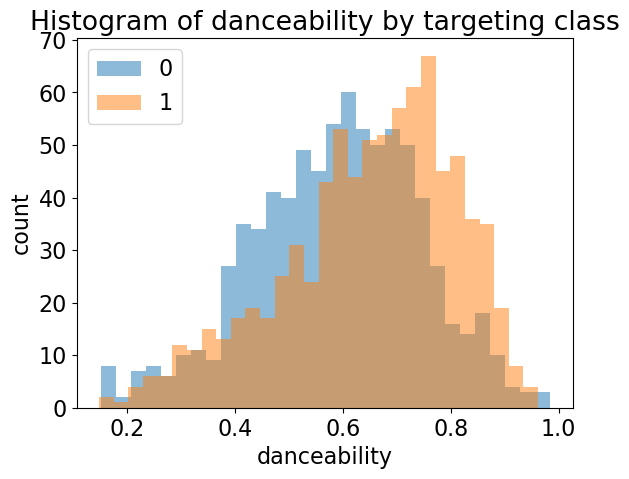

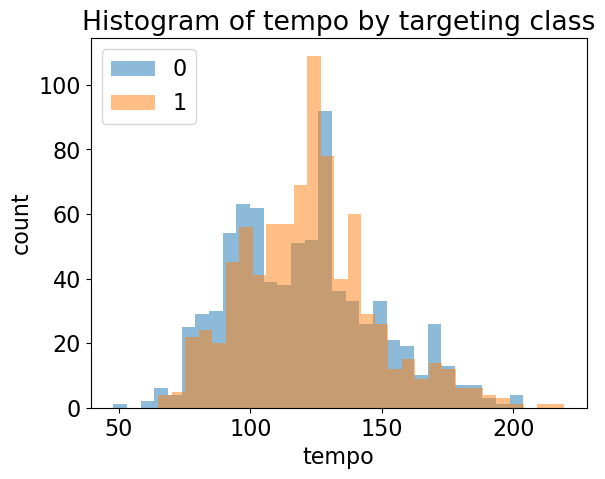

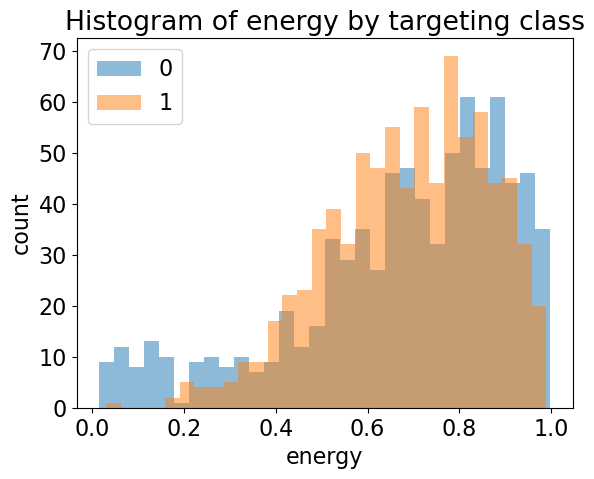

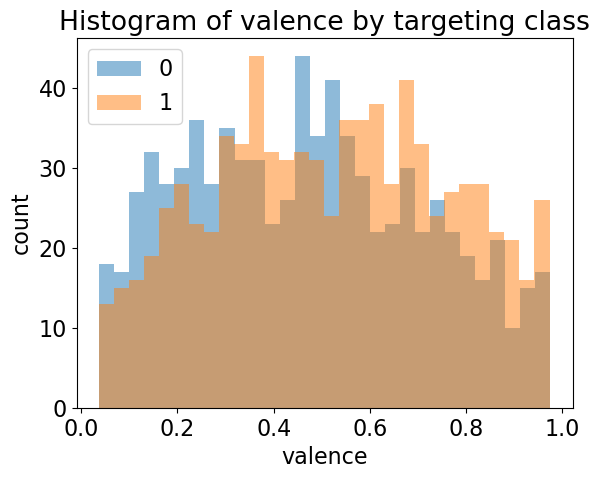

In [8]:
features=["danceability","tempo","energy","valence"]
for feature in features:
    plt.hist(negative_examples[feature], label='0', alpha=0.5, bins=30)
    plt.hist(positive_examples[feature], label='1', alpha=0.5, bins=30)
    plt.title('Histogram of '+ feature +' by targeting class')
    plt.legend(loc='upper left')
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.show()

#### 1(e)
rubric={points:4}

Let's say you had to make a decision stump (decision tree with depth 1), _by hand_, to predict the target class. Just from looking at the plots above, describe a reasonable split (feature name and threshold) and what class you would predict in the two cases. For example, in the loudness histogram provided earlier on, it seems that very large values of loudness are generally disliked (more blue on the right side of the histogram), so you might answer something like this: "A reasonable split would be to predict 0 if loudness > -5 (and predict 1 otherwise)."

In [8]:
print("In the tempo histogram provided above, it seems that larger values of tempo are generally liked (more orange on the right side of the histogram), hence a reasonable split would be to predict 1 if tempo > 120 (and predict 0 otherwise)")

In the tempo histogram provided above, it seems that larger values of tempo are generally liked (more orange on the right side of the histogram), hence a reasonable split would be to predict 1 if tempo > 120 (and predict 0 otherwise)


#### 1(f)
rubric={points:2}

Let's say that, for a particular feature, the histograms of that feature are identical for the two target classes. Does that mean the feature is not useful for predicting the target class?



In [9]:
print("when the histograms of a feature are identical for the two target classes it is still considered useful since when compared with a histogram of another feature it might give us another conclusion and would be useful.")

when the histograms of a feature are identical for the two target classes it is still considered useful since when compared with a histogram of another feature it might give us another conclusion and would be useful.


#### 1(g) 
rubric={points:2}

Note that the dataset includes two free text features labeled `song_title` and `artist`:

In [10]:
df_train[["song_title", "artist"]].head()

,song_title,artist
260,WTF (Where They From) [feat. Pharrell Williams],Missy Elliott
1286,"10,000 Reasons (Bless the Lord) [Radio Version]",Matt Redman
1344,American Dream,Chelsea Grin
1197,Feel This Moment,Pitbull
119,Trap Queen,Fetty Wap


- Do you think these features could be useful in predicting whether the user liked the song or not? 
- Would there be any difficulty in using them in your model?   

In [11]:
print("These features in their current form cannot be used, since we do no have anyway to classify them as good or bad from their textual values, in order to use them we will either have to assign an average rating to an artist or process the data in another way before including it in our model")

These features in their current form cannot be used, since we do no have anyway to classify them as good or bad from their textual values, in order to use them we will either have to assign an average rating to an artist or process the data in another way before including it in our model


<br><br>

## Exercise 2: Using sklearn to build a decision tree classifier

#### 2(a) 
rubric={points:2}

- Create `X_train` and `y_train` and `X_test` and `y_test` from `df_train` and `df_test` above. Skip the `song_title` and `artist` features for now. 
- Fit a `DecisionTreeClassifier` on the train set.

In [12]:
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz

df_train, df_test = train_test_split(spotify_df, test_size=0.2, random_state=321)
X_train, y_train = df_train.drop(columns=['song_title', 'artist','target']), df_train['target']
X_test, y_test = df_test.drop(columns=['song_title', 'artist','target']), df_test['target']
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

#### 2(b)
rubric={points:2}

Use the `predict` method to predict the class of the tenth example in your `X_train`. Is the prediction correct? That is, does it match with the corresponding class in `y_train`?  

> Hint: you can grab the tenth example with `X_train.iloc[[9]]`.

In [13]:
predicted = model.predict(X_train.iloc[[9]])
print(predicted[0])

1


In [14]:
print(y_train.iloc[[9][0]])

1


("Yes they are same, i.e 1")

#### 2(c) 
rubric={points:2}

Use the `cross_val_score` function on your training set to compute the 10-fold cross-validation accuracy of your tree. 

In [15]:
cv_scores = cross_val_score(model, X_train, y_train, cv=10)
print(f"Average cross-validation score = {np.mean(cv_scores):}")
print(cv_scores)
# From Lecture 3

Average cross-validation score = 0.6832489839736217
[0.67901235 0.63580247 0.65432099 0.70186335 0.74534161 0.63354037
 0.71428571 0.70807453 0.65838509 0.70186335]


#### 2(d)
rubric={points:2}

The above is useful, but we would like to see the training accuracy as well. 

- Compute the 10-fold cross-validation again but this time using the `cross_validate` function with `return_train_score=True`. 
- Print out both the cross-validation score and the training score.
- Is your cross-validation score exactly the same as what you got in the previous part? Very briefly discuss.

In [16]:
scores = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)
pd.DataFrame(scores)
pd.DataFrame(pd.DataFrame(scores).mean())
# From Lecture 3

,0
fit_time,0.022709
score_time,0.002535
test_score,0.683847
train_score,0.998898


In [17]:
print("Test scores aren't exactly the same but they are fairly close to each other (~5%) since it is trained on the same set of data while cross validation occurs. the training score is greater than the cross validation score. we also have train error to be very low as compared to validation error, hence this is a case of overfitting on training data.")

Test scores aren't exactly the same but they are fairly close to each other (~5%) since it is trained on the same set of data while cross validation occurs. the training score is greater than the cross validation score. we also have train error to be very low as compared to validation error, hence this is a case of overfitting on training data.


#### 2(e)
rubric={points:1}

Do you see a significant difference between the training score and the cross-validation score? Briefly discuss.

In [18]:
print("Yes we do see a significant difference between the training scores and cross-validation score. Training score is naturally high since our classifier has no depth specified and it is able 'memorize' the data well, however that is not the case with cross-validation")

Yes we do see a significant difference between the training scores and cross-validation score. Training score is naturally high since our classifier has no depth specified and it is able 'memorize' the data well, however that is not the case with cross-validation


#### 2(f)
rubric={points:1}

Inspect the 10 sub-scores from the 10 folds of cross-validation. How does this inform the trustworthiness of your cross validation score?

In [19]:
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,0.024746,0.002992,0.716049,0.999311
1,0.026209,0.002992,0.641975,0.998622
2,0.021480,0.003306,0.648148,0.999311
3,0.018945,0.003129,0.714286,0.998623
4,0.027924,0.002016,0.726708,0.998623
5,0.024057,0.001996,0.614907,0.998623
6,0.023775,0.001995,0.726708,0.998623
7,0.018042,0.002000,0.714286,0.999311
8,0.020590,0.002912,0.627329,0.999311
9,0.021325,0.002008,0.708075,0.998623


We see fairly similar values across the rows for tests except a couple 

## Exercise 3: Hyperparameters 
rubric={points:10}

In this exercise, you'll experiment with the `max_depth` hyperparameter of the decision tree classifier. See the [`DecisionTreeClassifier` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for more details.

- Explore the `max_depth` hyperparameter. Run 10-fold cross-validation for trees with different values of `max_depth` (at least 10 different values in the range 1 to 25).
- For each `max_depth`, get both the train accuracy and the cross-validation accuracy.
- Make a plot with `max_depth` on the *x*-axis and the train and cross-validation scores on the *y*-axis. That is, your plot should have two curves, one for train and one for cross-validation. Include a legend to specify which is which.
- Discuss how changing the `max_depth` hyperparameter affects the training and cross-validation accuracy. From these results, what depth would you pick as the optimal depth? 
- Do you think that the depth you chose would generalize to other "spotify" datasets (i.e., data on other spotify users)?

> Note: generally speaking (for all assignments) you are welcome to copy/paste code directly from the lecture notes, though I ask that you add a small citation (e.g. "Adapted from lecture 2") if you do so.

In [20]:
results_dict = {
    "depth": [],
    "mean_train_accuracy": [],
    "mean_cv_accuracy": [],
    "std_cv_error": [],
    "std_train_error": [],
}
param_grid = {"max_depth": np.arange(1, 26,2)}

for depth in param_grid["max_depth"]:
    model = DecisionTreeClassifier(max_depth=depth)
    scores = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)
    results_dict["depth"].append(depth)
    results_dict["mean_cv_accuracy"].append(np.mean(scores["test_score"]))
    results_dict["mean_train_accuracy"].append(np.mean(scores["train_score"]))
    results_dict["std_cv_error"].append(scores["test_score"].std())
    results_dict["std_train_error"].append(scores["train_score"].std())

results_df = pd.DataFrame(results_dict)
results_df = results_df.set_index("depth")
#adapted from lecture 3

From my plot I would pick 9 as the optimal depth since that is where the mean_cv_accuracy is max
------------------------------------------------------------------------------------------------
As max_depth increases, training accruacy gradually increases and then stays constant at 1, since after a certain point it essentially memorizes the data and overfits. However, this doesn't scale well for the cv-accuracy, since overfitting tends to make our model learn features that may not be as relevant and accuracy tends to go down
------------------------------------------------------------------------------------------------
It is hard to comment on other such datasets, since we do not have ALL the spotify data ever so we cannot just say that extrapolate our findings to those datasets. It may very well be possible that other datasets take a different range of values for the features in dicussion 


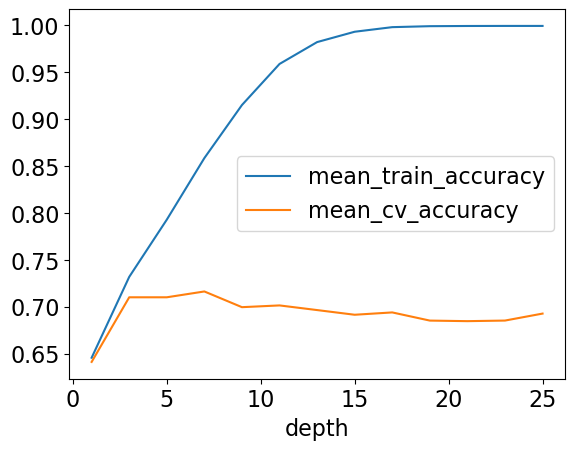

In [21]:
results_df[["mean_train_accuracy", "mean_cv_accuracy"]].plot();
# From lecture 3 notes
print("From my plot I would pick 9 as the optimal depth since that is where the mean_cv_accuracy is max") 
print("------------------------------------------------------------------------------------------------")
print("As max_depth increases, training accruacy gradually increases and then stays constant at 1, since after a certain point it essentially memorizes the data and overfits. However, this doesn't scale well for the cv-accuracy, since overfitting tends to make our model learn features that may not be as relevant and accuracy tends to go down")
print("------------------------------------------------------------------------------------------------")
print("It is hard to comment on other such datasets, since we do not have ALL the spotify data ever so we cannot just say that extrapolate our findings to those datasets. It may very well be possible that other datasets take a different range of values for the features in dicussion ")

## Exercise 4: Test set
rubric={points:4}

Remember the test set you created way back at the beginning of this assignment? Let's use it now to see if our cross-validation score from the previous exercise is trustworthy. 

- Select your favorite `max_depth` from the previous part.
- Train a decision tree classifier using that `max_depth` on the _entire training set_.
- Compute and display the test score. 
- How does it compare to the cross-validation score from the previous exercise? Briefly discuss. 

In [22]:
model = DecisionTreeClassifier(max_depth=9)
model.fit(X_train, y_train)
print("Test accuracy:   %0.3f" % model.score(X_test, y_test))
print("It is reasonably close the score we found in the last exercise (~0.69), this is expected since for the depths we plotted this was the best performing depth in terms of cv_accuracy and the cross-validation score is average over 10 cross-folds so it represents the mean of the better and worse cases than our current accuracy. If we look at all scores in the table, we can see that some are higher while some are lower as well.")
#adapted from lecture 3

Test accuracy:   0.661
It is reasonably close the score we found in the last exercise (~0.69), this is expected since for the depths we plotted this was the best performing depth in terms of cv_accuracy and the cross-validation score is average over 10 cross-folds so it represents the mean of the better and worse cases than our current accuracy. If we look at all scores in the table, we can see that some are higher while some are lower as well.


## Exercise 5: Conceptual questions
rubric={points:3}

Consider the dataset below, which has $6$ examples and $2$ features:

$$ X = \begin{bmatrix}5 & 2\\4 & 3\\  2 & 2\\ 10 & 10\\ 9 & -1\\ 9& 9\end{bmatrix}, \quad y = \begin{bmatrix}-1\\-1\\-1\\-1\\+1\\+1\end{bmatrix}.$$

1. Say we fit a decision stump (depth 1 decision tree) and the first split is on the first feature (left column) being less than 5.5. What would we predict in the "true" and "false" cases here?
2. What training accuracy would the above stump get on this data set?
3. Can we obtain 100% accuracy with a single decision stump in this particular example?

1) True cases would be when the left column is less than 5.5 for row 1,2,3 and false when it takes values greater than 5.5 for rows 4,5,6. 
2) Let's assume feature > 5.5 maps to 1 and < 5.5 maps to -1, in that case the training accuracy will be 5/6 ~83.3333%. With 10 being the only wrongly predicted value.
3) It is not possible to get 100% accuracy for the above stump since there are values > 5.5 and < 5.5 that map to the same y. For eg. 10 maps to -1 and even 4 maps to -1. If our decision stump is based on left column being less than 5.5, then we cannot achieve 100% accuracy for this example. 

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 